# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# Importing the data

In [2]:
# path to string
path = r'/Users/puchater/Documents/CareerFoundry/Data Immersion/6 Final Project/2 Data'

In [3]:
happy = pd.read_pickle(os.path.join(path, 'Prepared Data', 'happy_clean_data.pkl'))

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
happy.shape

(1961, 11)

In [6]:
happy.head()

,Country,Year,Happiness score,GDP,Social support,Life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [7]:
happy.rename(columns = {'Country name' : 'Country', 'year': 'Year', 
                     'Life Ladder': 'Happiness score', 'Log GDP per capita': 'GDP',
                     'Social support': 'Social support', 'Healthy life expectancy at birth' : 'Life expectancy', 'Freedom to make life choices' : 'Freedom', 'Generosity':'Generosity',
                      'Perceptions of corruption':'Corruption', 'Positive affect':'Positive affect', 'Negative affect': 'Negative affect'},
                      inplace = True)

In [8]:
happy.head()

,Country,Year,Happiness score,GDP,Social support,Life expectancy,Freedom,Generosity,Corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919


In [9]:
happy_numeric = happy[['Happiness score', 'GDP','Social support', 'Life expectancy', 'Freedom', 'Generosity', 'Corruption']]

In [10]:
happy_numeric

,Happiness score,GDP,Social support,Life expectancy,Freedom,Generosity,Corruption
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620
...,...,...,...,...,...,...,...
2194,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209
2195,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652
2196,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523
2197,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945


In [11]:
happy_clean = happy_numeric[happy_numeric['Social support'].notna()]

In [12]:
happy_clean.isnull().sum()

Happiness score    0
GDP                0
Social support     0
Life expectancy    0
Freedom            0
Generosity         0
Corruption         0
dtype: int64

# The elbow technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(happy_clean).score(happy_clean) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/puchater/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/puchater/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/puchater/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/puchater/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/p

[-103147.65984471573,
 -32492.505591958656,
 -19338.049238421834,
 -13195.251027701597,
 -9612.381114221069,
 -7005.911615557804,
 -5708.557453291789,
 -4731.803197708206,
 -4140.710545099696]

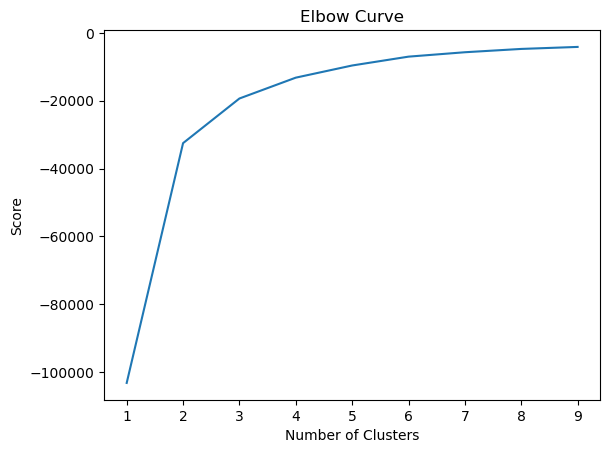

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# K-means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, random_state=0, n_init="auto") 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(happy_clean)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [18]:
happy_clean['clusters'] = kmeans.fit_predict(happy_clean)

/var/folders/h2/_kwm8tsx60g1sw4xhnb42h500000gn/T/ipykernel_2346/422595874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_clean['clusters'] = kmeans.fit_predict(happy_clean)


In [19]:
happy_clean.head()

,Happiness score,GDP,Social support,Life expectancy,Freedom,Generosity,Corruption,clusters
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,2
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,2
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,2
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,2
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,2


In [20]:
happy_clean['clusters'].value_counts()

1    766
0    731
2    462
Name: clusters, dtype: int64

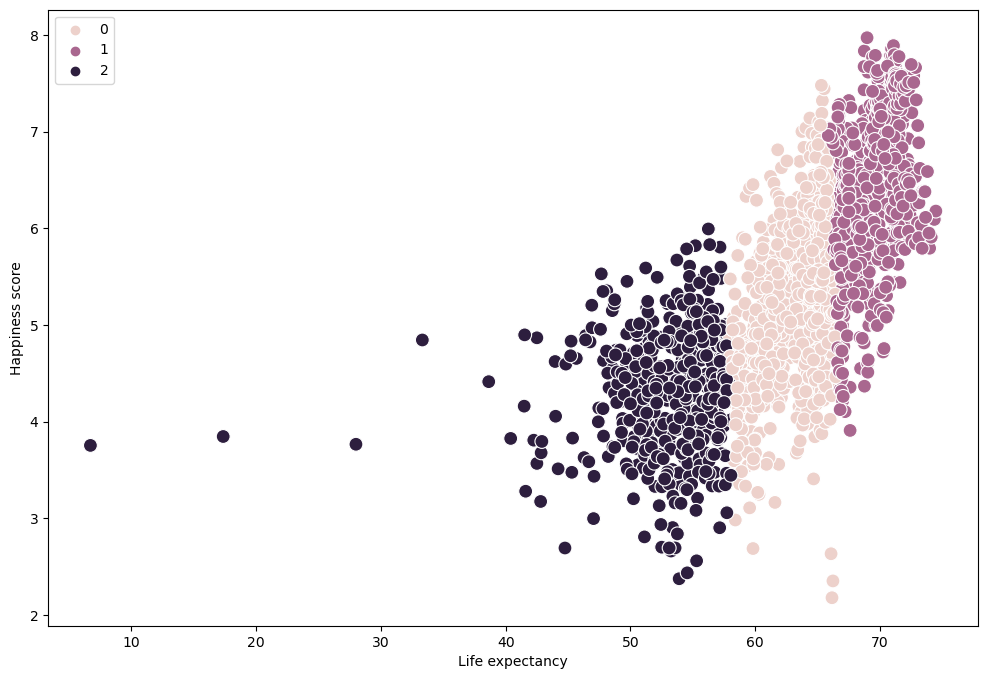

In [21]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy_clean['Life expectancy'], y=happy_clean['Happiness score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Life expectancy') # Label x-axis.
plt.ylabel('Happiness score') # Label y-axis.
plt.show()

In [22]:
# This plot suggest that with Life prediction below 60 y.o. there is no happiness score above 6 which would classify country as happy.

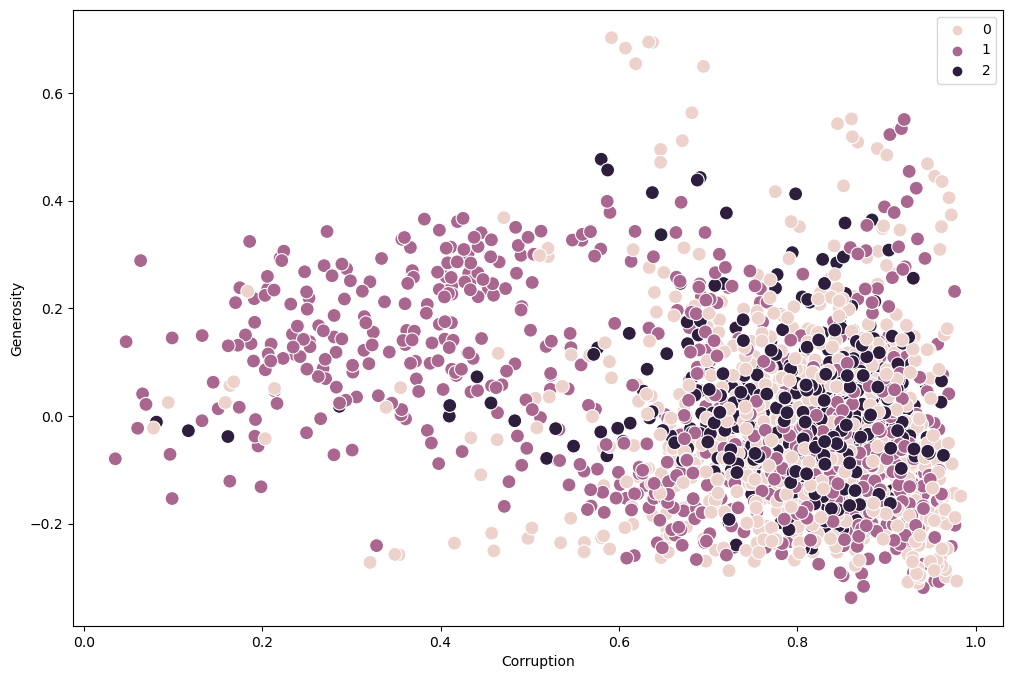

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy_clean['Corruption'], y=happy_clean['Generosity'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Corruption') # Label x-axis.
plt.ylabel('Generosity') # Label y-axis.
plt.show()

In [24]:
# This figure doesn't make a sense.

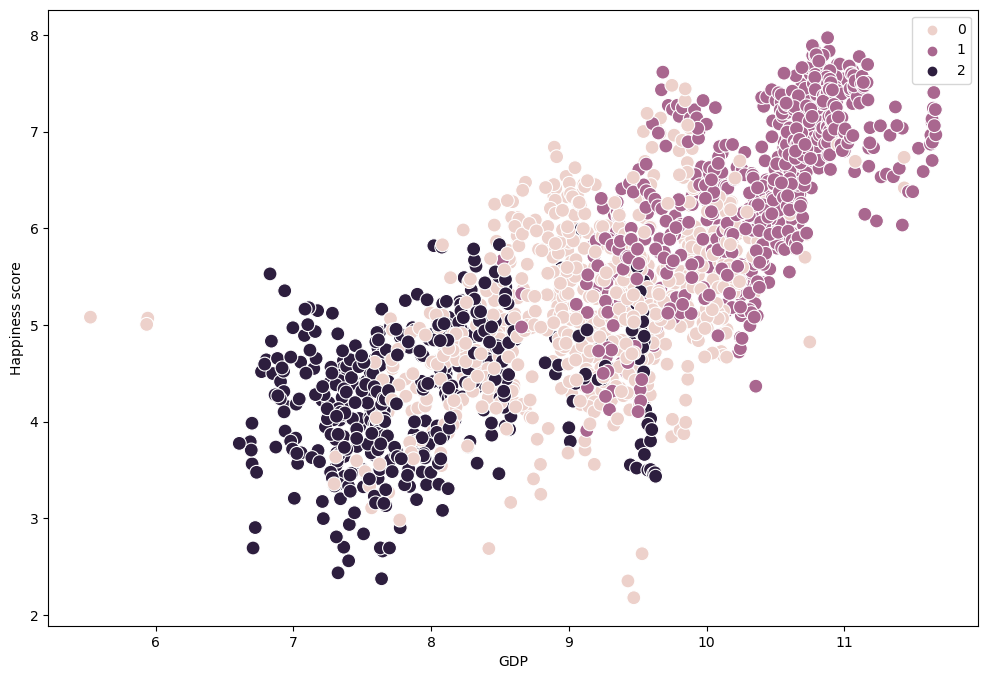

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy_clean['GDP'], y=happy_clean['Happiness score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Happiness score') # Label y-axis.
plt.show()

In [26]:
# This figure shows that high GDP score cluster shows no happiness score below 3, which would classify a country as sad.
# Also low GDP cluster shows no happiness score above 6 which would classify country as happy.

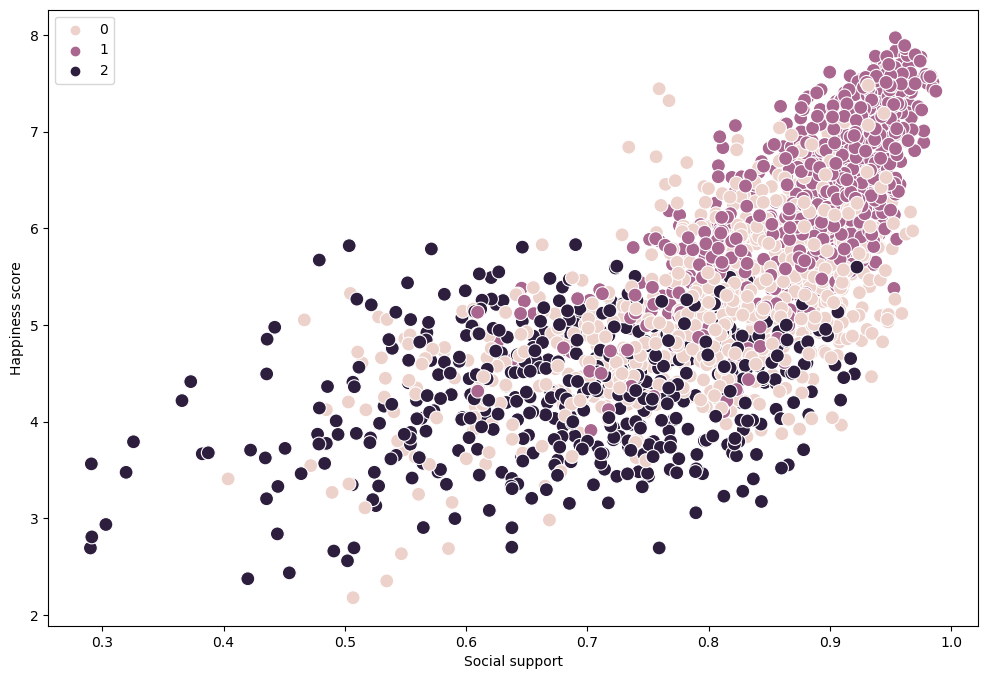

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy_clean['Social support'], y=happy_clean['Happiness score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social support') # Label x-axis.
plt.ylabel('Happiness score') # Label y-axis.
plt.show()

In [28]:
# This figure shows that there is no happiness score above 7 witch social support belov 0.9. Suggesting strong role of social support for happiness.

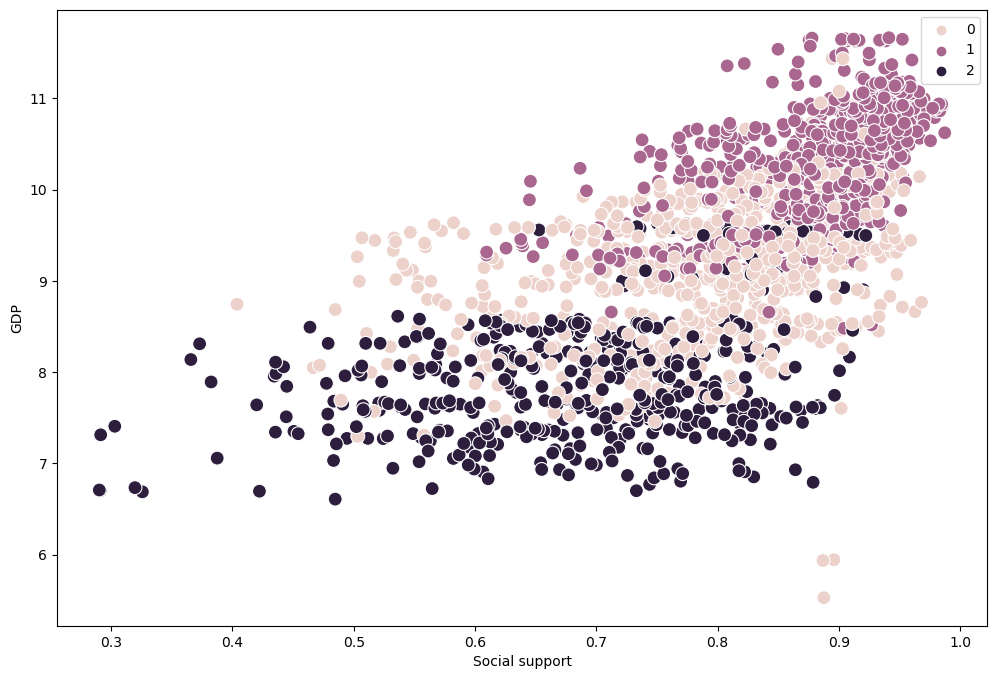

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy_clean['Social support'], y=happy_clean['GDP'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social support') # Label x-axis.
plt.ylabel('GDP') # Label y-axis.
plt.show()

In [30]:
# This figure shows that the highest social support cluster starts with GDP per capita above 9.

In [31]:
happy_clean.loc[happy_clean['clusters'] == 2, 'cluster'] = 'dark purple'
happy_clean.loc[happy_clean['clusters'] == 1, 'cluster'] = 'purple'
happy_clean.loc[happy_clean['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/h2/_kwm8tsx60g1sw4xhnb42h500000gn/T/ipykernel_2346/2837004439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_clean.loc[happy_clean['clusters'] == 2, 'cluster'] = 'dark purple'


In [32]:
happy_clean.groupby('cluster').agg({'Happiness score':['mean', 'median'], 
                         'GDP':['mean', 'median'], 
                         'Social support':['mean', 'median'],
                          'Life expectancy':['mean', 'median'],
                           'Freedom':['mean', 'median'],        
                                  'Generosity':['mean', 'median'], 
                            'Corruption':['mean', 'median']})

Happiness score                  GDP            Social support  \
                       mean    median       mean     median           mean   
cluster                                                                      
dark purple        4.298200  4.328895   7.944384   7.839574       0.691569   
pink               5.194922  5.165639   9.157995   9.227262       0.797659   
purple             6.409235  6.444090  10.364743  10.492955       0.888380   

                      Life expectancy              Freedom            \
               median            mean     median      mean    median   
cluster                                                                
dark purple  0.708077       52.759102  53.575001  0.680035  0.706335   
pink         0.816383       63.085903  63.680000  0.727682  0.740343   
purple       0.907617       69.491847  69.760002  0.802001  0.831505   

            Generosity           Corruption            
                  mean    median       mean    median  
cluster                                                
dark purple   0.005078 -0.011576   0.799077  0.820020  
pink         -0.018823 -0.048872   0.790546  0.805910  
purple        0.015542 -0.011703   0.676539  0.759514

In [33]:
# Export your dataframe as a pickle file and store in “Prepared Data” folder.
happy_clean.to_csv(os.path.join(path, 'Prepared Data', 'happy_clean_clusters.csv'))